In [1]:
import os
import utils
import connectome_create
# viz_method = one of ['itkwidgets', 'vtk']
viz_method = 'vtk'

# import some of our favorite packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
# import nglui.statebuilder as ngstbld

# # this is the EM specific package for querying the EM data
from caveclient import CAVEclient


# from meshparty import trimesh_io, trimesh_vtk
# from meshparty import skeletonize, skeleton_io, skeleton
import cloudvolume

%load_ext autoreload
%autoreload 2

query timestamp: 2022-09-14 00:00:00


In [2]:
# from pathlib import Path
# import json

# with open(Path.home() / '.cloudvolume/secrets/'/'cave-secret.json') as f:
#         tokens = json.load(f)
        
# seg_source = 'graphene://https://cave.fanc-fly.com/segmentation/table/mar2021_prod'
# cv = cloudvolume.CloudVolume(cloudpath=seg_source, use_https=True, secrets=tokens)

In [3]:
datastack_name = 'fanc_production_mar2021'

client = CAVEclient(datastack_name)

In [4]:
# client = CAVEclient()

# # if not os.path.isfile(os.path.expanduser("~/.cloudvolume/secrets/cave-secret.json")):
# client.auth.get_new_token(open=True)

In [5]:
# if you have not yet setup this computer, uncomment this below line
# paste the token from the website in, and run the line

# client.auth.save_token(token="c14cd7a3e18a1a697716a399afbf5778", overwrite=True)

# then comment or delete the line as you don't need to run it on this computer  again

# Load Premotor table

In [8]:
pre_to_df = pd.read_pickle('./dfs_pre_to_/pre_to_df_ordered_no_frags_20220913.pkl')   

In [9]:
pre_to_df
# The columns are the premotor neurons
# The rows are the neurons they contact, including motor neurons

cell_class                                                                                                        descending  \
preferred_pool                                                                                                 thorax_stance   
NT                                                                                                                       NaN   
classification_system                                                                                                    NaN   
cell_type                                                                                                                NaN   
segID                                                                                                     648518346466589294   
cell_class       preferred_pool NT    classification_system                  cell_type post_pt_root_id                         
motor            thorax_stance  Glu   sternal_posterior_rotator_miller_32    0         648518346499790035                  0   
                                                                                       648518346494806962                  0   
                                                                                       648518346501837930                 68   
                                                                                       648518346480104102                 12   
                                      pleural_remotor_and_abductor_miller_29 0         648518346486098834                118   
...                                                                                                                      ...   
vnc_non_premotor empty          empty empty                                  empty     648518346514384583                  0   
                                                                                       648518346513862681                  0   
                                                                                       648518346489678935                  0   
                                                                                       648518346500916246                  0   
                                                                                       648518346467161095                  0   

cell_class                                                                                                                    \
preferred_pool                                                                                                                 
NT                                                                                                                             
classification_system                                                                                                          
cell_type                                                                                                                      
segID                                                                                                     648518346486251689   
cell_class       preferred_pool NT    classification_system                  cell_type post_pt_root_id                         
motor            thorax_stance  Glu   sternal_posterior_rotator_miller_32    0         648518346499790035                  5   
                                                                                       648518346494806962                  6   
                                                                                       648518346501837930                 28   
                                                                                       648518346480104102                  5   
                                      pleural_remotor_and_abductor_miller_29 0         648518346486098834                 18   
...                                                                                                                      ...   
vnc_non_premotor empty         

In [18]:
# the levels for the columns and row indices are 
print(pre_to_df.index.names)
print(pre_to_df.columns.names)

# I kept the segID and post_pt_root_id names different just to be able to remember whether I'm on the pre or postsynaptic side

['cell_class', 'preferred_pool', 'NT', 'classification_system', 'cell_type', 'post_pt_root_id']
['cell_class', 'preferred_pool', 'NT', 'classification_system', 'cell_type', 'segID']


In [16]:
# The cell_classes for the targets of preMNs are
pre_to_df.index.get_level_values('cell_class').unique()

Index(['motor', 'descending', 'sensory', 'ascending', 'intersegmental',
       'local', 'non_t1_motor', 'descending_post', 'sensory_post',
       'ascending_post', 'neurmodulatory_ascending_neuron',
       'vnc_non_premotor'],
      dtype='object', name='cell_class')

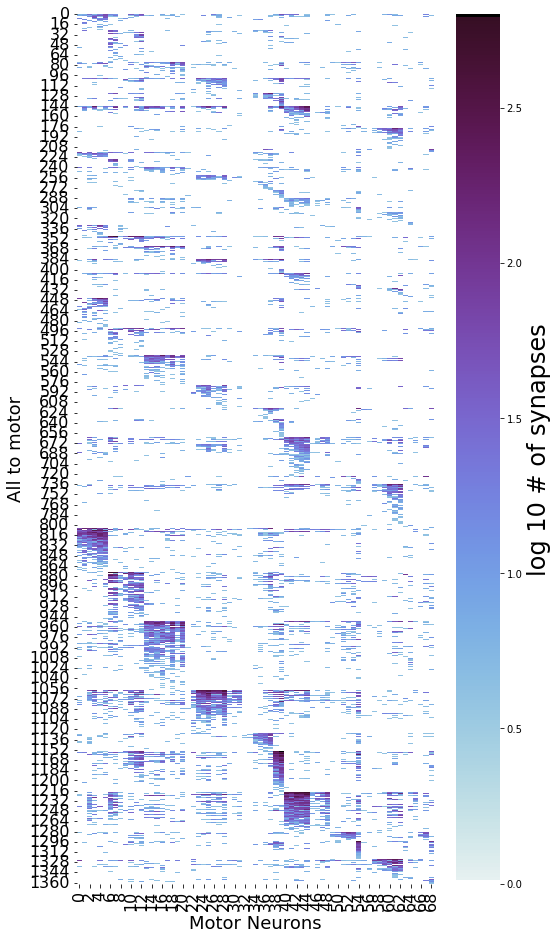

In [10]:
# You can find all the neurons of a given class by indexing into the rows (again, the targets/outputs of preMNs)
All = slice(None)

input_tup = (All,All,All,All,All,All)
output_tup = ('motor',All,All,All,All,All)

# Get just the slice of the pre_to_df
pre_df_slice = pre_to_df.loc[output_tup,input_tup]

%config InlineBackend.figure_formats = ['png']
%matplotlib inline

cmap = utils.white_dense()

fig = plt.figure(1, figsize = [8,16])
ax = sns.heatmap(np.log10(pre_df_slice.T.to_numpy()+1), cmap=cmap)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
# cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'log 10 # of synapses', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('All to motor', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

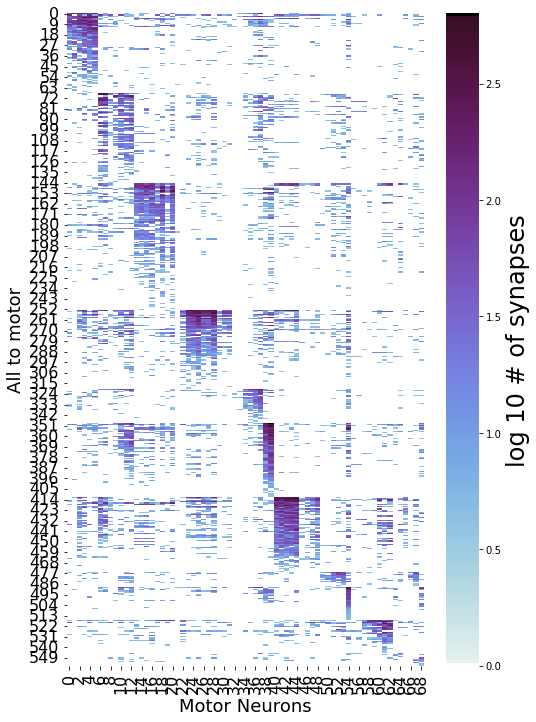

In [20]:
# Here are all the local neurons onto motor neurons
All = slice(None)

input_tup = ('local',All,All,All,All,All)
output_tup = ('motor',All,All,All,All,All)

# Get just the slice of the pre_to_df
pre_df_slice = pre_to_df.loc[output_tup,input_tup]

%config InlineBackend.figure_formats = ['png']
%matplotlib inline

cmap = utils.white_dense()

fig = plt.figure(1, figsize = [8,12])
ax = sns.heatmap(np.log10(pre_df_slice.T.to_numpy()+1), cmap=cmap)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
# cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'log 10 # of synapses', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('All to motor', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

In [ ]:
# Here are all the bristles onto mns
# You can find all the neurons of a given class by indexing into the rows (again, the targets/outputs of preMNs)
All = slice(None)

input_tup = (All,All,All,All,All,All)
output_tup = ('motor',All,All,All,All,All)

# Get just the slice of the pre_to_df
pre_df_slice = pre_to_df.loc[output_tup,input_tup]

%config InlineBackend.figure_formats = ['png']
%matplotlib inline

cmap = utils.white_dense()

fig = plt.figure(1, figsize = [8,16])
ax = sns.heatmap(np.log10(pre_df_slice.T.to_numpy()+1), cmap=cmap)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
# cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'log 10 # of synapses', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('All to motor', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

In [26]:
# A little helper function to make axis labels a little nicer
def keep_first_string_in_list(in_list):
    out_list = []
    key = None
    for s in in_list:
        if key is None:
            key = s
            out_list = out_list + [key]
            continue
        elif s==key:
            out_list = out_list + ['']
        else:
            key = s
            out_list = out_list + [s]
    return out_list

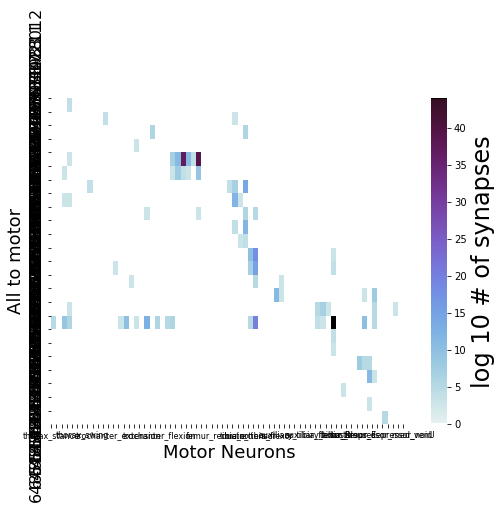

In [37]:
# Here are all of the bristle preMNs
pre_to_df.groupby(level=[2,3]).size()

All = slice(None)

input_tup = ('sensory',All,All,All,'Bristle',All)
output_tup = ('motor',All,All,All,All,All)
pre_df_slice = pre_to_df.loc[output_tup,input_tup]

fig = plt.figure(1, figsize = [8,6])

# plot the log(N+1)
# ax = sns.heatmap(np.log10(pre_df_slice.T.to_numpy()+1), cmap=cmap)

# or plot just the number
ax = sns.heatmap((pre_df_slice.T.to_numpy()), cmap=cmap)

cbar = ax.collections[0].colorbar
cbar.set_label(label = 'log 10 # of synapses', size=24)

xticklabels = keep_first_string_in_list(pre_df_slice.index.get_level_values('preferred_pool'))
ax.set_xticks([i for i in range(len(xticklabels))])
ax.set_xticklabels(xticklabels)

yticklabels = keep_first_string_in_list(pre_df_slice.columns.get_level_values('segID'))
ax.set_yticks([i for i in range(len(yticklabels))])
ax.set_yticklabels(yticklabels)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('All to motor', fontsize =18)
plt.xticks(fontsize = 16)
plt.yticks(rotation='horizontal',fontsize=8)
plt.show()

In [14]:
# overview of the NT and classification_system levels
pre_to_df.groupby(level=[2,3]).size()

NT     classification_system                              
Ach    A                                                        55
       C                                                        78
       DProN_Afferent                                            3
       DProN_Unsure                                             11
       E                                                        22
       F                                                         1
       J                                                        25
       K                                                         9
       N                                                        28
       ProAN_Afferent                                            4
       T                                                        15
       T1_L_Afferent                                            82
       VProN_Afferent                                            3
       VProN_Unsure                                              3
GAB

In [ ]:
# overview of the preferred_motor_pools for the motor neurons
